## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor

In [2]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import hvplot.pandas  # noqa
import datetime as dt
from datetime import datetime
# from xgboost import XGBRegressor

# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# import data file
file_path = 'english_video_data.csv'

In [4]:
videos_df = pd.read_csv(file_path)

videos_df.tail(10)

,c_channel_id,v_video_id,v_date_publishedAt,v_time_publishedAt,c_channel_title,c_channel_upload_playlist,c_channel_subCount,c_channel_videoCount,c_channel_viewCount,v_category_id,...,v_comment_count,v_likes,v_favorites,v_views,v_definition,v_duration,v_caption,v_age_restricted,v_privacy_status,v_made_for_kids
22506,UCMRnsnlHHtVt0WmTzoVyk-w,5-fx67uGpJs,2024-11-09,11:11:22,DIY queen,UUMRnsnlHHtVt0WmTzoVyk-w,16,132,3047,22,...,0,1,0,1,hd,0:00:12,False,Not Restricted,public,False
22507,UCf1U16LSYc8QhortB6Bg1Zw,0A8RI8GcDiE,2024-10-28,04:23:59,Diy Craft and Art ideas 💫,UUf1U16LSYc8QhortB6Bg1Zw,12,11,1906,22,...,0,5,0,11,hd,0:00:44,False,Not Restricted,public,False
22508,UCf1U16LSYc8QhortB6Bg1Zw,1Q0pZ8cHS3I,2024-07-19,13:13:44,Diy Craft and Art ideas 💫,UUf1U16LSYc8QhortB6Bg1Zw,12,11,1906,22,...,0,14,0,446,hd,0:00:41,False,Not Restricted,public,False
22509,UCf1U16LSYc8QhortB6Bg1Zw,LW6c42JnpdU,2024-07-17,04:48:40,Diy Craft and Art ideas 💫,UUf1U16LSYc8QhortB6Bg1Zw,12,11,1906,22,...,0,17,0,538,hd,0:00:33,False,Not Restricted,public,False
22510,UCf1U16LSYc8QhortB6Bg1Zw,PoOQF3Dw6n4,2024-07-17,13:56:19,Diy Craft and Art ideas 💫,UUf1U16LSYc8QhortB6Bg1Zw,12,11,1906,22,...,0,6,0,421,hd,0:00:38,False,Not Restricted,public,False
22511,UCf1U16LSYc8QhortB6Bg1Zw,3_hSnZsG1i0,2024-07-18,13:54:19,Diy Craft and Art ideas 💫,UUf1U16LSYc8QhortB6Bg1Zw,12,11,1906,22,...,0,11,0,413,hd,0:00:32,False,Not Restricted,public,False
22512,UCf1U16LSYc8QhortB6Bg1Zw,Uev83QY04h8,2024-08-12,13:59:04,Diy Craft and Art ideas 💫,UUf1U16LSYc8QhortB6Bg1Zw,12,11,1906,22,...,0,4,0,12,hd,0:00:15,False,Not Restricted,public,False
22513,UCf1U16LSYc8QhortB6Bg1Zw,s4gMPgVB0N4,2024-08-12,04:18:37,Diy Craft and Art ideas 💫,UUf1U16LSYc8QhortB6Bg1Zw,12,11,1906,22,...,0,4,0,20,hd,0:00:08,False,Not Restricted,public,False
22514,UCco0YFnoXvvXL5tD6Cc7Lbw,MqZ-rzkT6Ck,2024-12-06,15:31:20,Eve diy and arts,UUco0YFnoXvvXL5tD6Cc7Lbw,5,2,215,22,...,0,7,0,98,hd,0:00:12,False,Not Restricted,public,False
22515,UC9m5bhs8lLRh7k9EAJAo94Q,OPXQ6XBpMZY,2024-10-13,13:31:28,AZ DIY Pools,UU9m5bhs8lLRh7k9EAJAo94Q,0,1,18,22,...,0,0,0,18,hd,0:03:25,False,Not Restricted,public,False


In [5]:
# Determine the number of unique values in each column.
videos_df.nunique()


c_channel_id                   400
v_video_id                   22516
v_date_publishedAt             366
v_time_publishedAt           12795
c_channel_title                400
c_channel_upload_playlist      400
c_channel_subCount             350
c_channel_videoCount           318
c_channel_viewCount            400
v_category_id                   15
v_tags                        8717
v_title                      21557
v_description                13500
v_comment_count                593
v_likes                       3268
v_favorites                      1
v_views                      13374
v_definition                     2
v_duration                    3020
v_caption                        2
v_age_restricted                 2
v_privacy_status                 1
v_made_for_kids                  2
dtype: int64

In [6]:
# checking dataypes
videos_df.dtypes

c_channel_id                 object
v_video_id                   object
v_date_publishedAt           object
v_time_publishedAt           object
c_channel_title              object
c_channel_upload_playlist    object
c_channel_subCount            int64
c_channel_videoCount          int64
c_channel_viewCount           int64
v_category_id                 int64
v_tags                       object
v_title                      object
v_description                object
v_comment_count               int64
v_likes                       int64
v_favorites                   int64
v_views                       int64
v_definition                 object
v_duration                   object
v_caption                      bool
v_age_restricted             object
v_privacy_status             object
v_made_for_kids                bool
dtype: object

In [7]:
# Drop v_favorites and v_privacy_status since they only have one value
videos_df_2 = videos_df.drop(['v_favorites', 'v_privacy_status','c_channel_id', 'v_video_id', 'c_channel_upload_playlist'], axis=1)


In [8]:
# converting date and time published to datetime type

videos_df_2['v_date_publishedAt'] = videos_df_2['v_date_publishedAt'].astype('datetime64[s]')

videos_df_2['v_time_publishedAt'] = videos_df_2['v_time_publishedAt'].astype('datetime64[s]')



In [9]:
# splitting the date and time published into separate columns

videos_df_2['v_year'] = videos_df_2['v_date_publishedAt'].dt.year
videos_df_2['v_mont'] = videos_df_2['v_date_publishedAt'].dt.month
videos_df_2['v_day'] = videos_df_2['v_date_publishedAt'].dt.day
videos_df_2['v_hour'] = videos_df_2['v_time_publishedAt'].dt.hour
videos_df_2['v_minute'] = videos_df_2['v_time_publishedAt'].dt.minute
videos_df_2['v_second'] = videos_df_2['v_time_publishedAt'].dt.second


In [10]:
# droping date and time published since we don't need them anymore
videos_df_2.drop(['v_date_publishedAt', 'v_time_publishedAt'], axis=1, inplace=True)
videos_df_2.dtypes



c_channel_title         object
c_channel_subCount       int64
c_channel_videoCount     int64
c_channel_viewCount      int64
v_category_id            int64
v_tags                  object
v_title                 object
v_description           object
v_comment_count          int64
v_likes                  int64
v_views                  int64
v_definition            object
v_duration              object
v_caption                 bool
v_age_restricted        object
v_made_for_kids           bool
v_year                   int32
v_mont                   int32
v_day                    int32
v_hour                   int32
v_minute                 int32
v_second                 int32
dtype: object

In [11]:
# Transforming durationg to a datetime object

videos_df_2['v_duration_time'] = pd.to_timedelta(videos_df_2['v_duration'])


In [12]:
# converting the duration into total seconds

videos_df_2['v_duration_time'] = videos_df_2['v_duration_time'].dt.total_seconds()

# drop the old duration column
videos_df_2.drop(['v_duration'], axis=1, inplace=True)

In [13]:
# check types again
videos_df_2.dtypes

c_channel_title          object
c_channel_subCount        int64
c_channel_videoCount      int64
c_channel_viewCount       int64
v_category_id             int64
v_tags                   object
v_title                  object
v_description            object
v_comment_count           int64
v_likes                   int64
v_views                   int64
v_definition             object
v_caption                  bool
v_age_restricted         object
v_made_for_kids            bool
v_year                    int32
v_mont                    int32
v_day                     int32
v_hour                    int32
v_minute                  int32
v_second                  int32
v_duration_time         float64
dtype: object

In [14]:
# Cleaning v_category_id, grouping the less used ones into 'other' category

videos_df_cats = videos_df_2.copy()

videos_df_cats.head(5)

,c_channel_title,c_channel_subCount,c_channel_videoCount,c_channel_viewCount,v_category_id,v_tags,v_title,v_description,v_comment_count,v_likes,...,v_caption,v_age_restricted,v_made_for_kids,v_year,v_mont,v_day,v_hour,v_minute,v_second,v_duration_time
0,5-Minute Crafts,81100000,7445,27960945663,26,"['5 minute craft', '5 minutes craft', '5-minut...",BRILLIANT LIFE HACKS 🌟💙 COOL DOLL REUSE,Discover brilliant life hacks and creative way...,28,442,...,False,Not Restricted,False,2024,9,2,11,0,48,7415.0
1,5-Minute Crafts,81100000,7445,27960945663,26,"['5 minute craft', '5 minutes craft', '5-minut...",SECRET SMART COOKING HACKS THAT CHANGE EVERYTH...,🍳 Ready to elevate your cooking game? In this ...,21,1165,...,False,Not Restricted,False,2024,8,30,11,0,54,7308.0
2,5-Minute Crafts,81100000,7445,27960945663,26,"['5 minute craft', '5 minutes craft', '5-minut...",INCREDIBLE RAINBOW IDEAS 🌈 Creative Room Makeo...,🎨 Ready to transform your space into something...,43,1374,...,False,Not Restricted,False,2024,8,31,11,0,26,3604.0
3,5-Minute Crafts,81100000,7445,27960945663,26,"['5 minute craft', '5 minutes craft', '5-minut...",BOOST YOUR GPA WITH THESE EPIC SCHOOL HACKS & ...,Ready to ace school and crush math? Check out ...,19,274,...,False,Not Restricted,False,2024,8,31,13,0,57,3669.0
4,5-Minute Crafts,81100000,7445,27960945663,26,"['5 minute craft', '5 minutes craft', '5-minut...",FROM DULL TO STUNNING CLOTHES | MUST-SEE CLOTH...,👗 Ready to transform your wardrobe? In this vi...,27,485,...,False,Not Restricted,False,2024,9,1,11,0,36,1216.0


In [15]:

videos_df_cats['v_category_id'].value_counts()


v_category_id
26    14635
22     2299
24     1502
2      1370
27      996
28      931
1       290
20      213
19       78
29       64
17       61
25       58
15       11
10        5
23        3
Name: count, dtype: int64

In [16]:
categories = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}

In [17]:
def name_categories(df, category_dict):
    # Iterate through each row in the dataframe
    for index, row in df.iterrows():
        # Check if the category ID is in the list of "other" categories
        if row['v_category_id'] in [23, 10, 17, 15, 19]:
            df.at[index, 'v_category_id'] = "other"
        elif row['v_category_id'] in category_dict:
            # Map the category ID to its name from the dictionary
            df.at[index, 'v_category_id'] = category_dict[row['v_category_id']]

    return df


In [18]:
# transformed the categories into names
videos_df_cats = name_categories(videos_df_cats, categories)

videos_df_cats


,c_channel_title,c_channel_subCount,c_channel_videoCount,c_channel_viewCount,v_category_id,v_tags,v_title,v_description,v_comment_count,v_likes,...,v_caption,v_age_restricted,v_made_for_kids,v_year,v_mont,v_day,v_hour,v_minute,v_second,v_duration_time
0,5-Minute Crafts,81100000,7445,27960945663,Howto & Style,"['5 minute craft', '5 minutes craft', '5-minut...",BRILLIANT LIFE HACKS 🌟💙 COOL DOLL REUSE,Discover brilliant life hacks and creative way...,28,442,...,False,Not Restricted,False,2024,9,2,11,0,48,7415.0
1,5-Minute Crafts,81100000,7445,27960945663,Howto & Style,"['5 minute craft', '5 minutes craft', '5-minut...",SECRET SMART COOKING HACKS THAT CHANGE EVERYTH...,🍳 Ready to elevate your cooking game? In this ...,21,1165,...,False,Not Restricted,False,2024,8,30,11,0,54,7308.0
2,5-Minute Crafts,81100000,7445,27960945663,Howto & Style,"['5 minute craft', '5 minutes craft', '5-minut...",INCREDIBLE RAINBOW IDEAS 🌈 Creative Room Makeo...,🎨 Ready to transform your space into something...,43,1374,...,False,Not Restricted,False,2024,8,31,11,0,26,3604.0
3,5-Minute Crafts,81100000,7445,27960945663,Howto & Style,"['5 minute craft', '5 minutes craft', '5-minut...",BOOST YOUR GPA WITH THESE EPIC SCHOOL HACKS & ...,Ready to ace school and crush math? Check out ...,19,274,...,False,Not Restricted,False,2024,8,31,13,0,57,3669.0
4,5-Minute Crafts,81100000,7445,27960945663,Howto & Style,"['5 minute craft', '5 minutes craft', '5-minut...",FROM DULL TO STUNNING CLOTHES | MUST-SEE CLOTH...,👗 Ready to transform your wardrobe? In this vi...,27,485,...,False,Not Restricted,False,2024,9,1,11,0,36,1216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22511,Diy Craft and Art ideas 💫,12,11,1906,People & Blogs,"['diy', 'YouTube shorts', 'handmade', 'painting']",Diy painting ideas #youtubeshorts #artist,NaN,0,11,...,False,Not Restricted,False,2024,7,18,13,54,19,32.0
22512,Diy Craft and Art ideas 💫,12,11,1906,People & Blogs,"['cute painting', 'shorts', 'viral', 'top pain...",Little chettah heart 💜 #diy,NaN,0,4,...,False,Not Restricted,False,2024,8,12,13,59,4,15.0
22513,Diy Craft and Art ideas 💫,12,11,1906,People & Blogs,"['diy', 'cute painting ideas', 'handmade', 'ca...",Cute painting 🎨 #shorts,NaN,0,4,...,False,Not Restricted,False,2024,8,12,4,18,37,8.0
22514,Eve diy and arts,5,2,215,People & Blogs,[],Drawing Kurdistan flag #shorts #edit #viralvideo,NaN,0,7,...,False,Not Restricted,False,2024,12,6,15,31,20,12.0


In [21]:
videos_df_cats.dtypes

c_channel_title          object
c_channel_subCount        int64
c_channel_videoCount      int64
c_channel_viewCount       int64
v_category_id            object
v_tags                   object
v_title                  object
v_description            object
v_comment_count           int64
v_likes                   int64
v_views                   int64
v_definition             object
v_caption                  bool
v_age_restricted         object
v_made_for_kids            bool
v_year                    int32
v_mont                    int32
v_day                     int32
v_hour                    int32
v_minute                  int32
v_second                  int32
v_duration_time         float64
dtype: object

In [ ]:
# cleaning up / transformin th tags columns
videos_df_cats['v_tags'].value_counts()


v_tags
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               8042
['123', '123 go', '123go', '5 minute crafts', '5 minute crafts diy', '5 minute crafts food', '5 minute crafts girly', 'beauty', 'craft', 'crafts', 'diy', 'diy activities', 'diy projects', 'do it yourself', 'easy', 'foodie beauty', 'girl', 'girls', 'hair', 'handcraft', 'how to', 'how to make', 'howto', 'life hacks', 'lifehacks', 'makeup', 'makeup tutorial', 'nail art', 'nails', 'tik tok', 'tiktok', 'tiktok trends', 'tiktok video', 'tips', '

In [23]:

from collections import Counter

# Combine all text into a single string
all_tags = ','.join(videos_df_cats['v_tags'])

# Split the text into words and convert to lowercase
tags = all_tags.lower().split(',')

# Count the frequency of each word
tags_counts = Counter(tags)


# Get the most common words
top_tags = tags_counts.most_common(1000)  # Get top 1000 words

print(top_tags)



[('[]', 8042), (" 'diy'", 4688), (" 'do it yourself'", 2544), (" 'crafts'", 2525), (" 'diy projects'", 2236), (" 'how to'", 2122), (" 'tips'", 2055), (" 'life hacks'", 2027), (" 'tutorial'", 1874), (" 'craft'", 1733), (" 'tricks'", 1710), (" 'lifehacks'", 1663), (" 'howto'", 1513), (" 'how to make'", 1495), (" 'handcraft'", 1491), (" 'diy activities'", 1473), (" 'easy'", 1372), (" 'girl'", 1112), (" 'hair'", 1088), (" 'ceramic coating'", 1081), (" 'tiktok'", 1011), ("['diy'", 993), (" '5 minute crafts'", 982), (" 'girls'", 961), (" 'woman'", 960), (" 'nails'", 955), (" 'beauty'", 945), (" 'makeup'", 944), (" 'makeup tutorial'", 943), (" '123go'", 941), (" 'tik tok'", 941), (" '123 go'", 940), (" 'nail art'", 940), (" 'tiktok trends'", 939), (" 'tiktok video'", 939), (" '5 minute crafts food'", 938), ("['123'", 937), (" '5 minute crafts diy'", 937), (" '5 minute crafts girly'", 937), (" 'foodie beauty'", 937), (" 'women']", 919), (" 'handmade'", 718), (" 'sewing'", 689), (" 'home decor'

In [52]:
import re
# Process the list to extract the words only
popular_tags = [re.sub(r"[^a-zA-Z0-9\s]", "", item[0]).strip() for item in top_tags if re.sub(r"[^a-zA-Z0-9\s]", "", item[0]).strip()]

popular_tags



['diy',
 'do it yourself',
 'crafts',
 'diy projects',
 'how to',
 'tips',
 'life hacks',
 'tutorial',
 'craft',
 'tricks',
 'lifehacks',
 'howto',
 'how to make',
 'handcraft',
 'diy activities',
 'easy',
 'girl',
 'hair',
 'ceramic coating',
 'tiktok',
 'diy',
 '5 minute crafts',
 'girls',
 'woman',
 'nails',
 'beauty',
 'makeup',
 'makeup tutorial',
 '123go',
 'tik tok',
 '123 go',
 'nail art',
 'tiktok trends',
 'tiktok video',
 '5 minute crafts food',
 '123',
 '5 minute crafts diy',
 '5 minute crafts girly',
 'foodie beauty',
 'women',
 'handmade',
 'sewing',
 'home decor',
 'foam',
 'car care',
 'rinseless wash',
 'detailing',
 'yvan lacroix',
 'all clean',
 'incredible suds',
 'clay towel',
 'keg sprayer',
 'carwash',
 'iron remover',
 'perforated synthetic decontamination towel',
 'ceramic coating car',
 'ceramic gloss',
 'apc',
 'paint decontamination',
 'diy detail',
 'quick beads',
 'pressure washer',
 'detailing car',
 'water spot remover',
 'paint correction',
 'detail keg

In [53]:
videos_df_tags = videos_df_cats.copy()


In [54]:
videos_df_tags

def split_tags_into_columns(df, tags_list):
    # Iterate through each row in the dataframe
    for index, row in df.iterrows():
        i = 0
        # Check if the category ID is in the list of "other" categories
        if row['v_tags'] in tags_list[i]:
            df.at[index, f'v_tag_{tags_list[i].value}'] = 1
        else:
            df.at[index, f'v_tag_{tags_list[i].value}'] = 0

    return df



In [55]:


def split_tags_into_columns(df, tags_list):
    """
    Splits tags in the 'v_tags' column into separate binary columns based on the provided tags_list.

    Parameters:
        df (pd.DataFrame): The DataFrame containing a 'v_tags' column with lists of tags.
        tags_list (list): A list of tag strings to create binary columns for.

    Returns:
        pd.DataFrame: The updated DataFrame with binary tag columns.
    """
    # Ensure the 'v_tags' column is a list type
    df['v_tags'] = df['v_tags'].apply(lambda x: x if isinstance(x, list) else [])

    # Iterate over the provided tags_list to create binary columns
    for tag in tags_list:
        column_name = f'v_tag_{tag}'
        df[column_name] = df['v_tags'].apply(lambda tags: 1 if tag in tags else 0)

    return df



In [56]:

videos_df_tags = split_tags_into_columns(videos_df_tags, popular_tags)

videos_df_tags


,c_channel_title,c_channel_subCount,c_channel_videoCount,c_channel_viewCount,v_category_id,v_tags,v_title,v_description,v_comment_count,v_likes,...,v_tag_garage gym,v_tag_home gym,v_tag_health,v_tag_top tips,v_tag_sealants,v_tag_painting tutorial,v_tag_survival,v_tag_christmas tree decorations,v_tag_ganchillo,v_tag_homemade tools
0,5-Minute Crafts,81100000,7445,27960945663,Howto & Style,[],BRILLIANT LIFE HACKS 🌟💙 COOL DOLL REUSE,Discover brilliant life hacks and creative way...,28,442,...,0,0,0,0,0,0,0,0,0,0
1,5-Minute Crafts,81100000,7445,27960945663,Howto & Style,[],SECRET SMART COOKING HACKS THAT CHANGE EVERYTH...,🍳 Ready to elevate your cooking game? In this ...,21,1165,...,0,0,0,0,0,0,0,0,0,0
2,5-Minute Crafts,81100000,7445,27960945663,Howto & Style,[],INCREDIBLE RAINBOW IDEAS 🌈 Creative Room Makeo...,🎨 Ready to transform your space into something...,43,1374,...,0,0,0,0,0,0,0,0,0,0
3,5-Minute Crafts,81100000,7445,27960945663,Howto & Style,[],BOOST YOUR GPA WITH THESE EPIC SCHOOL HACKS & ...,Ready to ace school and crush math? Check out ...,19,274,...,0,0,0,0,0,0,0,0,0,0
4,5-Minute Crafts,81100000,7445,27960945663,Howto & Style,[],FROM DULL TO STUNNING CLOTHES | MUST-SEE CLOTH...,👗 Ready to transform your wardrobe? In this vi...,27,485,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22511,Diy Craft and Art ideas 💫,12,11,1906,People & Blogs,[],Diy painting ideas #youtubeshorts #artist,NaN,0,11,...,0,0,0,0,0,0,0,0,0,0
22512,Diy Craft and Art ideas 💫,12,11,1906,People & Blogs,[],Little chettah heart 💜 #diy,NaN,0,4,...,0,0,0,0,0,0,0,0,0,0
22513,Diy Craft and Art ideas 💫,12,11,1906,People & Blogs,[],Cute painting 🎨 #shorts,NaN,0,4,...,0,0,0,0,0,0,0,0,0,0
22514,Eve diy and arts,5,2,215,People & Blogs,[],Drawing Kurdistan flag #shorts #edit #viralvideo,NaN,0,7,...,0,0,0,0,0,0,0,0,0,0


In [57]:

videos_df_dummies = pd.get_dummies(data= videos_df_tags, columns=['v_category_id','v_definition', 'v_caption', 'v_age_restricted', 'v_made_for_kids'],dtype=int)

videos_df_dummies

,c_channel_title,c_channel_subCount,c_channel_videoCount,c_channel_viewCount,v_tags,v_title,v_description,v_comment_count,v_likes,v_views,...,v_category_id_Science & Technology,v_category_id_other,v_definition_hd,v_definition_sd,v_caption_False,v_caption_True,v_age_restricted_Not Restricted,v_age_restricted_ytAgeRestricted,v_made_for_kids_False,v_made_for_kids_True
0,5-Minute Crafts,81100000,7445,27960945663,[],BRILLIANT LIFE HACKS 🌟💙 COOL DOLL REUSE,Discover brilliant life hacks and creative way...,28,442,76602,...,0,0,1,0,1,0,1,0,1,0
1,5-Minute Crafts,81100000,7445,27960945663,[],SECRET SMART COOKING HACKS THAT CHANGE EVERYTH...,🍳 Ready to elevate your cooking game? In this ...,21,1165,341133,...,0,0,1,0,1,0,1,0,1,0
2,5-Minute Crafts,81100000,7445,27960945663,[],INCREDIBLE RAINBOW IDEAS 🌈 Creative Room Makeo...,🎨 Ready to transform your space into something...,43,1374,222425,...,0,0,1,0,1,0,1,0,1,0
3,5-Minute Crafts,81100000,7445,27960945663,[],BOOST YOUR GPA WITH THESE EPIC SCHOOL HACKS & ...,Ready to ace school and crush math? Check out ...,19,274,40821,...,0,0,1,0,1,0,1,0,1,0
4,5-Minute Crafts,81100000,7445,27960945663,[],FROM DULL TO STUNNING CLOTHES | MUST-SEE CLOTH...,👗 Ready to transform your wardrobe? In this vi...,27,485,82374,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22511,Diy Craft and Art ideas 💫,12,11,1906,[],Diy painting ideas #youtubeshorts #artist,NaN,0,11,413,...,0,0,1,0,1,0,1,0,1,0
22512,Diy Craft and Art ideas 💫,12,11,1906,[],Little chettah heart 💜 #diy,NaN,0,4,12,...,0,0,1,0,1,0,1,0,1,0
22513,Diy Craft and Art ideas 💫,12,11,1906,[],Cute painting 🎨 #shorts,NaN,0,4,20,...,0,0,1,0,1,0,1,0,1,0
22514,Eve diy and arts,5,2,215,[],Drawing Kurdistan flag #shorts #edit #viralvideo,NaN,0,7,98,...,0,0,1,0,1,0,1,0,1,0


In [58]:
videos_df_dummies.drop(columns=['v_tags', 'v_title','v_description','c_channel_title'], axis=1, inplace =True)

In [59]:
videos_df_dummies.dtypes

c_channel_subCount                  int64
c_channel_videoCount                int64
c_channel_viewCount                 int64
v_comment_count                     int64
v_likes                             int64
                                    ...  
v_caption_True                      int32
v_age_restricted_Not Restricted     int32
v_age_restricted_ytAgeRestricted    int32
v_made_for_kids_False               int32
v_made_for_kids_True                int32
Length: 968, dtype: object

In [60]:

videos_df_dummies.drop(columns=['v_age_restricted_ytAgeRestricted', 'v_made_for_kids_False', 'v_definition_sd', 'v_caption_False'], axis=1, inplace =True)


In [89]:
# drop views over 20000 to remove outlier
videos_df_dummies['v_views'].describe().apply("{0:.5f}".format)

videos_df_dummies = videos_df_dummies[videos_df_dummies['v_views'] <= 20000]

videos_df_dummies = videos_df_dummies[videos_df_dummies['v_views'] > 0]

In [90]:
# Split our preprocessed data into our features and target arrays
y = videos_df_dummies['v_views'].values

X = videos_df_dummies.drop(columns=['v_views']).values


In [91]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)


In [92]:
print(X_train.shape)

(13393, 963)


In [93]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Compile, Train and Evaluate the Model

In [94]:
# First ML model, we are using a Decision Tree model, reference:
# https://medium.com/@vk.viswa/unveiling-decision-tree-regression-exploring-its-principles-implementation-beb882d756c6#:~:text=Conclusion-,Introduction,focuses%20on%20estimating%20numeric%20outcomes.

regressor = DecisionTreeRegressor()

regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)



DecisionTreeRegressor()

In [95]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(y_pred)



[1.57e+03 1.12e+04 4.55e+03 ... 8.88e+03 2.87e+03 5.00e+00]


In [96]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)



0.6428787688375598

In [97]:

# linear regression model with skitlearn
from sklearn.linear_model import LinearRegression
# Create a model with scikit-learn
model = LinearRegression()



In [98]:

# Fit the data into the model
model.fit(X, y)

# Display the slope
print(f"Model's slope: {model.coef_}")

# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")



Model's slope: [-1.34e-03 -6.32e-02  5.99e-06 -3.99e+00  1.46e+01  2.15e-05 -4.24e+01
 -2.74e-01 -3.61e+01  2.53e+00 -4.16e+00  9.05e-02  4.65e-08 -1.93e-08
 -1.74e-08  1.53e-08 -1.30e-08 -1.85e-09  3.79e-10 -3.49e-10  2.66e-10
  9.35e-11  1.09e-11  3.41e-13  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  

In [99]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the X set
predicted_y_values = model.predict(X)

# Create a copy of the original data
videos_df_predicted = videos_df_dummies.copy()

# Add a column with the predicted salary values
videos_df_predicted["views_predicted"] = predicted_y_values

# Display sample data
videos_df_predicted.head()


,c_channel_subCount,c_channel_videoCount,c_channel_viewCount,v_comment_count,v_likes,v_views,v_year,v_mont,v_day,v_hour,...,v_category_id_News & Politics,v_category_id_Nonprofits & Activism,v_category_id_People & Blogs,v_category_id_Science & Technology,v_category_id_other,v_definition_hd,v_caption_True,v_age_restricted_Not Restricted,v_made_for_kids_True,views_predicted
509,20300000,6640,5187110540,10,64,5344,2024,4,27,15,...,0,0,0,0,0,1,0,1,0,6452.891782
510,20300000,6640,5187110540,10,63,4976,2024,7,31,10,...,0,0,0,0,0,1,0,1,0,6737.842374
511,20300000,6640,5187110540,4,54,4960,2024,7,27,10,...,0,0,0,0,0,1,0,1,0,6392.121380
512,20300000,6640,5187110540,0,86,9175,2024,7,27,15,...,0,0,0,0,0,1,0,1,0,6727.916195
513,20300000,6640,5187110540,3,44,7117,2024,7,28,6,...,0,0,0,0,0,1,0,1,0,6457.050314


In [100]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")



The score is 0.583192046700995.
The r2 is 0.583192046700995.
The mean squared error is 9479663.850083495.
The root mean squared error is 3078.9062749754976.
The standard deviation is 4769.0126022606455.


In [101]:
# Create a DataFrame with actual values and predicted values
comparison_df = pd.DataFrame({
    "Actual Values": y.flatten(),  # Assuming y is a 2D array; use y if it's 1D
    "Predicted Values": predicted_y_values.flatten()
})

# Add a column for residuals (differences between actual and predicted values)
comparison_df["Residuals"] = comparison_df["Actual Values"] - comparison_df["Predicted Values"]


comparison_df.head()



,Actual Values,Predicted Values,Residuals
0,5344,6452.891782,-1108.891782
1,4976,6737.842374,-1761.842374
2,4960,6392.121380,-1432.121380
3,9175,6727.916195,2447.083805
4,7117,6457.050314,659.949686


   Actual Values  Predicted Values    Residuals
0           5344       6452.891782 -1108.891782
1           4976       6737.842374 -1761.842374
2           4960       6392.121380 -1432.121380
3           9175       6727.916195  2447.083805
4           7117       6457.050314   659.949686


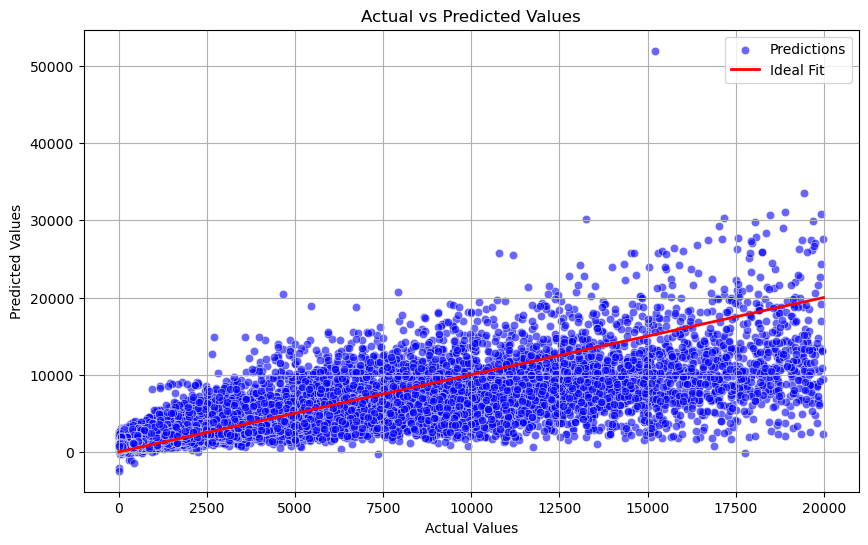

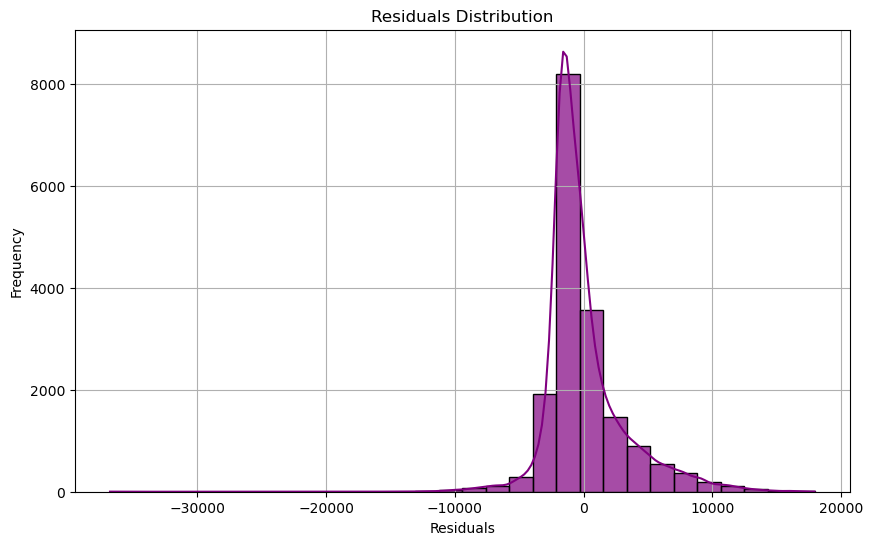

In [102]:

# Make predictions using the X set
predicted_y_values = model.predict(X)

# Create a DataFrame with actual values and predicted values
comparison_df = pd.DataFrame({
    "Actual Values": y.flatten(),  # Assuming y is a 2D array; use y if it's 1D
    "Predicted Values": predicted_y_values.flatten()
})

# Add a column for residuals
comparison_df["Residuals"] = comparison_df["Actual Values"] - comparison_df["Predicted Values"]

# Display sample data
print(comparison_df.head())

# Visualization of Actual vs Predicted values
plt.figure(figsize=(10, 6))
sb.scatterplot(x="Actual Values", y="Predicted Values", data=comparison_df, color="blue", alpha=0.6, label="Predictions")
plt.plot(
    [comparison_df["Actual Values"].min(), comparison_df["Actual Values"].max()],
    [comparison_df["Actual Values"].min(), comparison_df["Actual Values"].max()],
    color="red", linewidth=2, label="Ideal Fit"
)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Visualization of Residuals
plt.figure(figsize=(10, 6))
sb.histplot(comparison_df["Residuals"], bins=30, kde=True, color="purple", alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

